In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [2]:
mariposas_data = pd.read_csv('Vectores_Caracteristicos_Mariposas.csv')

# Separar las características y las etiquetas

In [3]:
X_mariposas = mariposas_data.drop("Etiqueta", axis=1).values
y_mariposas = mariposas_data["Etiqueta"].values

# Dividir el conjunto de datos en entrenamiento y prueba

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_mariposas, y_mariposas, test_size=0.3, random_state=42)

# Entrenar un modelo de regresión softmax

In [5]:
softmax_mariposas = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1000, random_state=42)
softmax_mariposas.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

# Evaluar el rendimiento del modelo

In [6]:
y_pred = softmax_mariposas.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Aplicar PCA para reducir a 2 dimensiones y entrenar el modelo

In [7]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
softmax_pca = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1000, random_state=42)
softmax_pca.fit(X_train_pca, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

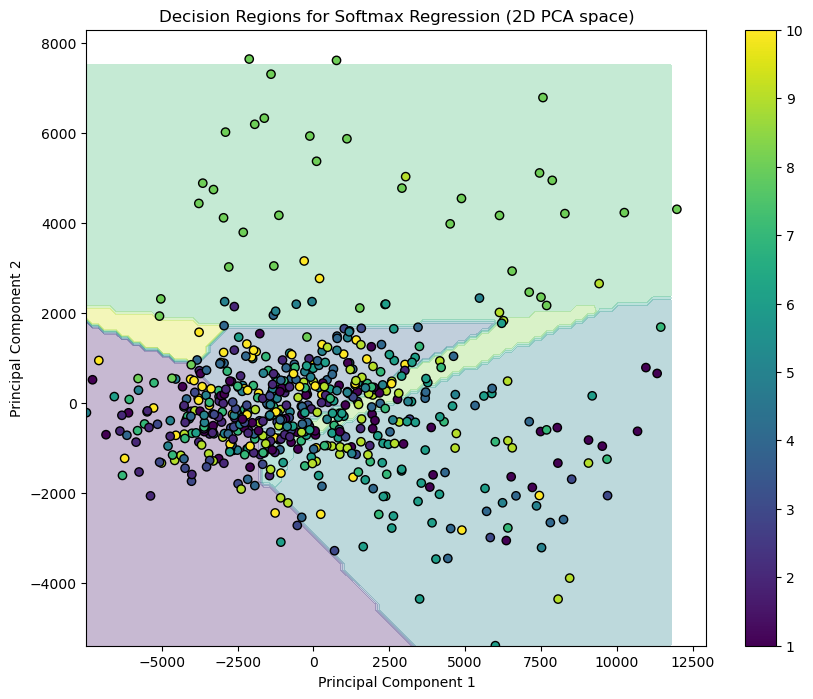

In [8]:
# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Entrenar el modelo de regresión softmax en el espacio 2D
softmax_pca = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1000, random_state=42)
softmax_pca.fit(X_train_pca, y_train)

# Visualizar las regiones de decisión
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max-x_min)/100),
                     np.arange(y_min, y_max, (y_max-y_min)/100))
Z = softmax_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, marker='o', edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("Decision Regions for Softmax Regression (2D PCA space)")
plt.colorbar()
plt.show()


# Aplicar PCA para reducir a 3 dimensiones y entrenar el modelo

In [9]:
pca_3d = PCA(n_components=3)
X_train_pca_3d = pca_3d.fit_transform(X_train)
X_test_pca_3d = pca_3d.transform(X_test)
softmax_pca_3d = LogisticRegression(multi_class="multinomial", solver="lbfgs", max_iter=1000, random_state=42)
softmax_pca_3d.fit(X_train_pca_3d, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

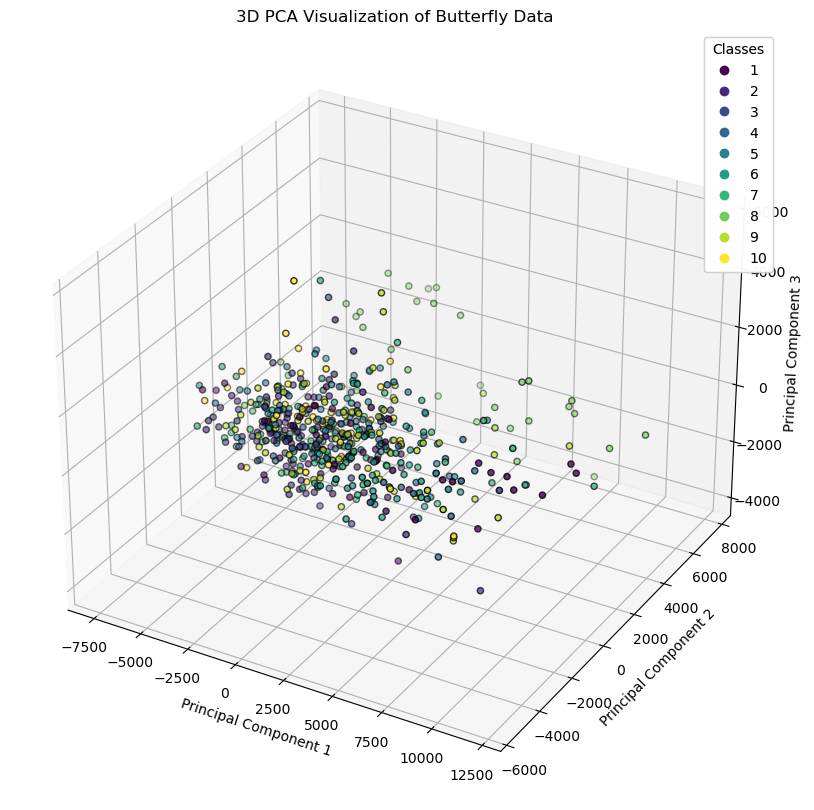

In [10]:
from mpl_toolkits.mplot3d import Axes3D

# Crear la figura y el eje 3D
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Colorear los puntos según las etiquetas verdaderas
scatter = ax.scatter(X_train_pca_3d[:, 0], X_train_pca_3d[:, 1], X_train_pca_3d[:, 2], c=y_train, marker='o', edgecolors='k', cmap='viridis')
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)

# Etiquetas y título
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title("3D PCA Visualization of Butterfly Data")

plt.show()
